In [5]:
from langgraph.graph import START, StateGraph
from typing_extensions import TypedDict


class State(TypedDict):
    text: str


def node_a(state: State) -> dict:
    return {"text": state["text"] + "a"}


def node_b(state: State) -> dict:
    return {"text": state["text"] + "b"}


graph = StateGraph(State)
graph.add_node("node_a", node_a)
graph.add_node("node_b", node_b)
graph.add_edge(START, "node_a")
graph.add_edge("node_a", "node_b")

print(graph.compile().invoke({"text": ""}))
# {'text': 'ab'}

{'text': 'ab'}


In [2]:
from langgraph.graph import START, StateGraph, END
from typing_extensions import TypedDict


class State(TypedDict):
    text: str


def node_a(state: State) -> dict:
    return {"text": state["text"] + "a"}


def node_b(state: State) -> dict:
    return {"text": state["text"] + "b"}


def node_c(state: State) -> dict:
    return {"text": state["text"] + "c"}


def router(state: State) -> str:
    """Decides whether to continue to node_c or end based on the text state."""
    # Example condition: if 'b' is in the text and the total length is less than 5, go to node_c
    # Otherwise, end the graph.
    if "b" in state["text"] and len(state["text"]) < 5:
        return "node_c"
    else:
        return END


graph = StateGraph(State)
graph.add_node("node_a", node_a)
graph.add_node("node_b", node_b)
graph.add_node("node_c", node_c)

graph.add_edge(START, "node_a")
graph.add_edge("node_a", "node_b")

# After node_b, we use the router to conditionally decide if we go to node_c or END
graph.add_conditional_edges("node_b", router)

# If the router decides to go to node_c, then node_c will lead to END
graph.add_edge("node_c", END)

app = graph.compile()

print("Executing with initial text: ''")
print(app.invoke({"text": ""}))  # Expected: a -> b -> c -> END (output: {'text': 'abc'})

print("\nExecuting with initial text: 'initial_long_text_'")
# This input will make len(text) > 5 after node_b, so it should go a -> b -> END
print(app.invoke({"text": "initial_long_text_"})) # Expected: a -> b -> END (output: {'text': 'initial_long_text_ab'})


Executing with initial text: ''
{'text': 'abc'}

Executing with initial text: 'initial_long_text_'
{'text': 'initial_long_text_ab'}


In [2]:
from langgraph.graph import START, StateGraph, END
from typing_extensions import TypedDict


class State(TypedDict):
    text: str


def node_a(state: State) -> dict:
    return {"text": state["text"] + "a"}


def node_b(state: State) -> dict:
    return {"text": state["text"] + "b"}


def node_c(state: State) -> dict:
    return {"text": state["text"] + "c"}


def router(state: State) -> str:
    """Decides whether to continue to node_c or end based on the text state."""
    # Example condition: if 'b' is in the text and the total length is less than 5, go to node_c
    # Otherwise, end the graph.
    if "b" in state["text"] and len(state["text"]) < 5:
        return "node_c"
    else:
        return END


graph = StateGraph(State)
graph.add_node("node_a", node_a)
graph.add_node("node_b", node_b)
graph.add_node("node_c", node_c)

graph.add_edge(START, "node_a")
graph.add_edge("node_a", "node_b")

# After node_b, we use the router to conditionally decide if we go to node_c or END
graph.add_conditional_edges("node_b", router)

# If the router decides to go to node_c, then node_c will lead to END
graph.add_edge("node_c", END)

app = graph.compile()

print("Executing with initial text: ''")
print(app.invoke({"text": ""}))  # Expected: a -> b -> c -> END (output: {'text': 'abc'})

print("\nExecuting with initial text: 'initial_long_text_'")
# This input will make len(text) > 5 after node_b, so it should go a -> b -> END
print(app.invoke({"text": "initial_long_text_"})) # Expected: a -> b -> END (output: {'text': 'initial_long_text_ab'})


Executing with initial text: ''
{'text': 'abc'}

Executing with initial text: 'initial_long_text_'
{'text': 'initial_long_text_ab'}


#Visualization

In [4]:
!sudo apt update
!sudo apt install -y graphviz graphviz-dev pkg-config
!pip install pygraphviz
!pip install networkx

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:5 https://cli.github.com/packages stable InRelease [3,917 B]
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Fetched 3,917 B in 1s (3,129 B/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
32 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pa

In [10]:
print(app.get_graph().draw_mermaid())


---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__(<p>__start__</p>)
	node_a(node_a)
	node_b(node_b)
	node_c(node_c)
	__end__(<p>__end__</p>)
	__start__ --> node_a;
	node_a --> node_b;
	node_b --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [3]:
app.get_graph().draw_png("graph.png")


##IPython.display

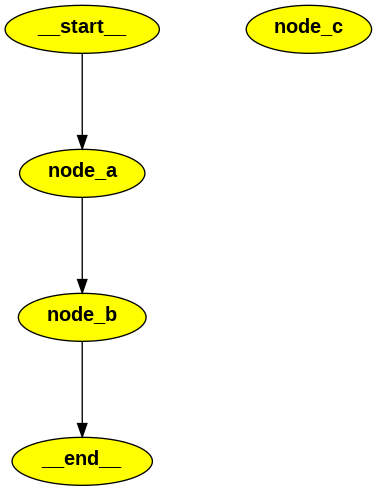

In [9]:
from IPython.display import Image, display

# The app object already has a draw_png method that directly uses pygraphviz
# This avoids the compatibility issue with networkx.drawing.nx_agraph.to_agraph
app.get_graph().draw_png("graph.png")
display(Image("graph.png"))

##graphviz

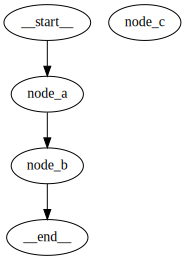

In [11]:
from graphviz import Digraph
from IPython.display import display

G = app.get_graph()  # your custom graph

dot = Digraph()

# Add nodes (try to get nodes from your graph object)
for node in getattr(G, 'nodes', []):
    dot.node(str(node))

# Add edges (adapt this to how your graph stores edges)
for edge in getattr(G, 'edges', []):
    # If edge is tuple with src, dst, ...
    src = edge[0]
    dst = edge[1]
    dot.edge(str(src), str(dst))

display(dot)


##Get the graph nodes and edges

In [12]:
G = app.get_graph()
print(type(G))
print(dir(G))
print(getattr(G, 'nodes', None))
print(getattr(G, 'edges', None))


<class 'langchain_core.runnables.graph.Graph'>
['__annotations__', '__bool__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_edge', 'add_node', 'draw_ascii', 'draw_mermaid', 'draw_mermaid_png', 'draw_png', 'edges', 'extend', 'first_node', 'last_node', 'next_id', 'nodes', 'print_ascii', 'reid', 'remove_node', 'to_json', 'trim_first_node', 'trim_last_node']
{'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'node_a': Node(id='node_a', name='node_a', data=node_a(tags=None, recurse=True, explode_args=False, fun